In [1]:
#####################################################################################################################

#  The code in the following cell reads and stores the housing data into data1 dataframe and first 5 is checked
#  to see whether data is correctly loaded.

####################################################################################################################


# The following code is used to ignore warnings that come in the output of jupyter console
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np

# loading or reading diabetes.csv into data1 as a dataframe 
data1=pd.read_csv('housing_train.csv')

# preserving the column names so that we can restore the columns when required
columns_original=data1.columns

# checking if the data has been successfully loaded or not by seeing top 5 records/observations
print(data1.shape)
data1.head()

(265190, 22)


,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195,apartment,1908,3,2.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
1,7041970863,https://bham.craigslist.org/apa/d/birmingham-w...,birmingham,https://bham.craigslist.org,1120,apartment,1319,3,2.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00707_uRrY9CsNMC...,Find Your Way to Haven Apartment Homes Come ho...,33.3755,-86.8045,al
2,7041966914,https://bham.craigslist.org/apa/d/birmingham-g...,birmingham,https://bham.craigslist.org,825,apartment,1133,1,1.5,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00h0h_b7Bdj1NLBi...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
3,7041966936,https://bham.craigslist.org/apa/d/birmingham-f...,birmingham,https://bham.craigslist.org,800,apartment,927,1,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00808_6ghZ8tSRQs...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
4,7041966888,https://bham.craigslist.org/apa/d/birmingham-2...,birmingham,https://bham.craigslist.org,785,apartment,1047,2,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00y0y_21c0FOvUXm...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al


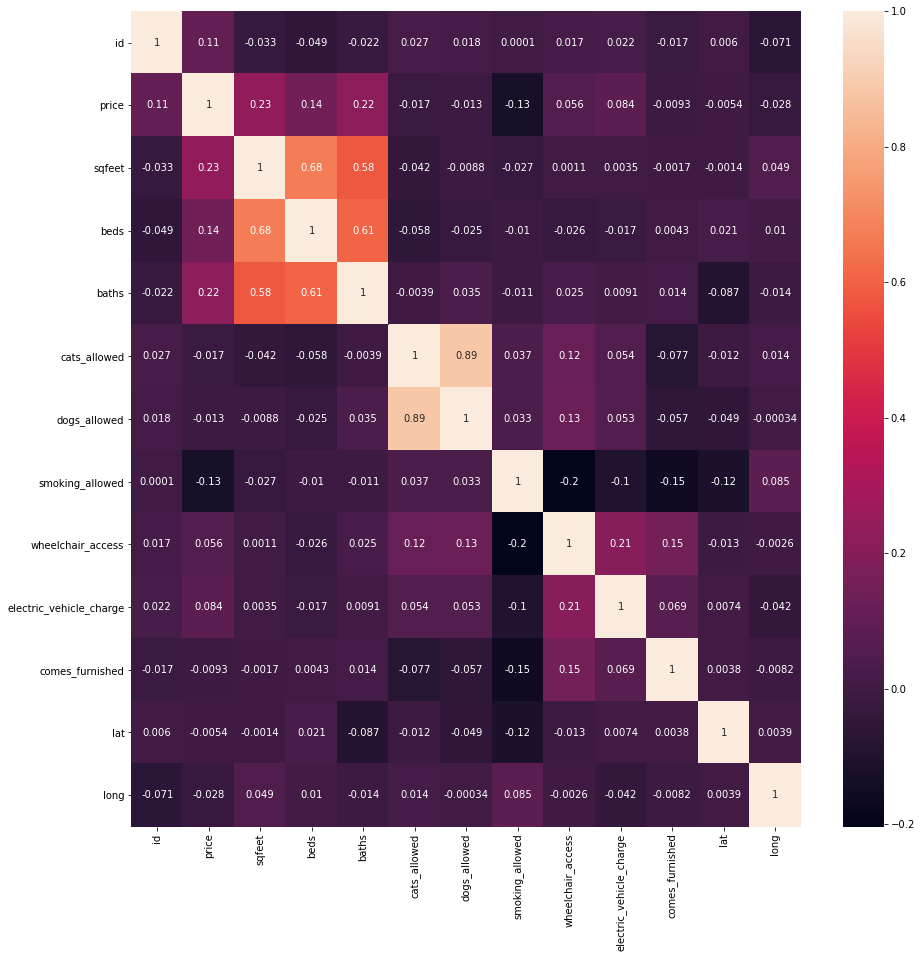

In [2]:
##################################################################################

# Plotting heat map to check the correlation between columns

##################################################################################
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(data1.corr(method='kendall'),annot=True)

In [3]:
# checking all the columns
data1.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')

In [4]:
# checking if there are any null values

data1.isnull().sum()

id                             0
url                            0
region                         0
region_url                     0
price                          0
type                           0
sqfeet                         0
beds                           0
baths                          0
cats_allowed                   0
dogs_allowed                   0
smoking_allowed                0
wheelchair_access              0
electric_vehicle_charge        0
comes_furnished                0
laundry_options            54311
parking_options            95135
image_url                      0
description                    2
lat                         1419
long                        1419
state                          1
dtype: int64

In [5]:
#########################################
# dropping unnecessary columns
#########################################
data1=data1.drop(columns={'id','url','region_url','image_url','description','lat','long'})
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265190 entries, 0 to 265189
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region                   265190 non-null  object 
 1   price                    265190 non-null  int64  
 2   type                     265190 non-null  object 
 3   sqfeet                   265190 non-null  int64  
 4   beds                     265190 non-null  int64  
 5   baths                    265190 non-null  float64
 6   cats_allowed             265190 non-null  int64  
 7   dogs_allowed             265190 non-null  int64  
 8   smoking_allowed          265190 non-null  int64  
 9   wheelchair_access        265190 non-null  int64  
 10  electric_vehicle_charge  265190 non-null  int64  
 11  comes_furnished          265190 non-null  int64  
 12  laundry_options          210879 non-null  object 
 13  parking_options          170055 non-null  object 
 14  stat

In [6]:
######################################################
# checking min,max, std  and other description of data
######################################################
data1.describe()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished
count,2.651900e+05,2.651900e+05,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000
mean,1.227285e+04,1.093678e+03,1.912414,1.483468,0.716822,0.696550,0.733896,0.078759,0.014360,0.048644
std,5.376352e+06,2.306888e+04,3.691900,0.630208,0.450543,0.459749,0.441920,0.269362,0.118968,0.215124
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.170000e+02,7.520000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.060000e+03,9.500000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.450000e+03,1.156000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
###########################################################################
# Removing null values and zeros where ever necessary
###########################################################################


from sklearn.impute import SimpleImputer

land_mode=data1['laundry_options'].mode()
print('land_mode::::',land_mode)
park_mode=data1['parking_options'].mode()
print('park_mode::::',park_mode)
state_mode=data1['state'].mode()
print('state_mode::::',state_mode)

data1['laundry_options'] = data1['laundry_options'].replace(np.nan,'0    w/d in unit')
data1['parking_options']=data1['parking_options'].replace(np.nan,'0    off-street parking')
data1['state']=data1['state'].replace(np.nan,'0    ca')

data1['price'] = data1['price'].replace(0,data1['price'].mean())
data1['sqfeet'] = data1['sqfeet'].replace(0,data1['sqfeet'].mean())
data1['baths'] = data1['baths'].replace(0,data1['baths'].mean())
data1['beds'] = data1['beds'].replace(0,data1['beds'].mode()[0])


# removing special characters if any
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","'"]

for char in spec_chars:
    data1['region'] = data1['region'].str.replace(char, '-')
    data1['type'] = data1['type'].str.replace(char, '-')
    data1['laundry_options'] = data1['laundry_options'].str.replace(char, '-')
    data1['parking_options'] = data1['parking_options'].str.replace(char, '-')    
    data1['state'] = data1['state'].str.replace(char, '-')
    
    

# checking if any null values are still present after imputing
data1.isnull().sum()




land_mode:::: 0    w/d in unit
dtype: object
park_mode:::: 0    off-street parking
dtype: object
state_mode:::: 0    ca
dtype: object


region                     0
price                      0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
parking_options            0
state                      0
dtype: int64

In [8]:
#######################################################################
# looking description again to see how the data is there after imputing
#######################################################################
data1.describe()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished
count,2.651900e+05,2.651900e+05,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000
mean,1.230978e+04,1.093852e+03,1.969196,1.494908,0.716822,0.696550,0.733896,0.078759,0.014360,0.048644
std,5.376352e+06,2.306887e+04,3.677401,0.616491,0.450543,0.459749,0.441920,0.269362,0.118968,0.215124
min,1.000000e+00,1.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.200000e+02,7.520000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.067000e+03,9.500000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.452000e+03,1.156000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#########################################
# checking the data types of each column
#########################################
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265190 entries, 0 to 265189
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region                   265190 non-null  object 
 1   price                    265190 non-null  float64
 2   type                     265190 non-null  object 
 3   sqfeet                   265190 non-null  float64
 4   beds                     265190 non-null  int64  
 5   baths                    265190 non-null  float64
 6   cats_allowed             265190 non-null  int64  
 7   dogs_allowed             265190 non-null  int64  
 8   smoking_allowed          265190 non-null  int64  
 9   wheelchair_access        265190 non-null  int64  
 10  electric_vehicle_charge  265190 non-null  int64  
 11  comes_furnished          265190 non-null  int64  
 12  laundry_options          265190 non-null  object 
 13  parking_options          265190 non-null  object 
 14  stat

In [10]:
#######################################################################################################
# Storing data1 into data2 and checking the columns . Storing data1 into data2 and checking the columns
#######################################################################################################

data2=data1
data2.columns

Index(['region', 'price', 'type', 'sqfeet', 'beds', 'baths', 'cats_allowed',
       'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'laundry_options',
       'parking_options', 'state'],
      dtype='object')

In [11]:
# checking region unique values as counts.Just a cross chcek and the following code is not needed for the application building
data2.region.value_counts()


jacksonville              4246
rochester                 3677
fayetteville              3652
omaha - council bluffs    2727
denver                    2671
                          ... 
zanesville - cambridge       3
corvallis-albany             3
northwest OK                 2
east oregon                  1
texoma                       1
Name: region, Length: 298, dtype: int64

In [12]:
########################################################################################
#  encoding the object data into numbers through label encoder
########################################################################################

print(data2.columns)


### The following code can be used instead of label encoder
#cat_columns = ['region','type','laundry_options','parking_options','state']
#for col in data2.columns:
#    if col in cat_columns:
#        data2[col]= data2[col].astype('category')
#        data2[col]= data2[col].cat.codes
        

        
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()

data2['region']= label_encoder.fit_transform(data2['region']) 
data2['type']= label_encoder.fit_transform(data2['type']) 
data2['laundry_options']= label_encoder.fit_transform(data2['laundry_options']) 
data2['parking_options']= label_encoder.fit_transform(data2['parking_options'])
data2['state']= label_encoder.fit_transform(data2['state']) 

#data2= label_encoder.fit_transform(data2)

    
data2.info()

Index(['region', 'price', 'type', 'sqfeet', 'beds', 'baths', 'cats_allowed',
       'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'laundry_options',
       'parking_options', 'state'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265190 entries, 0 to 265189
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region                   265190 non-null  int32  
 1   price                    265190 non-null  float64
 2   type                     265190 non-null  int32  
 3   sqfeet                   265190 non-null  float64
 4   beds                     265190 non-null  int64  
 5   baths                    265190 non-null  float64
 6   cats_allowed             265190 non-null  int64  
 7   dogs_allowed             265190 non-null  int64  
 8   smoking_allowed          265190 non-null  int64  
 9   wheelchai

In [13]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import linear_model
from sklearn.metrics import f1_score,accuracy_score
from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing 

###########################################################
# seperating features and label/target and scaling the data
###########################################################


#data3=scalar.fit_transform(data2)
#data3=pd.DataFrame(data3)
target=data2.price
features=data2.drop(columns={'price'})
features_columns=features.columns


from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
features=scalar.fit_transform(features)   
features=pd.DataFrame(features)
features.columns=features_columns

print(target)

# removing unnecessary features
features=features.drop(columns={'comes_furnished','smoking_allowed','dogs_allowed','cats_allowed'})
features.columns



0          1195.000000
1          1120.000000
2           825.000000
3           800.000000
4           785.000000
              ...     
265185    12272.853592
265186     1069.000000
265187     1507.000000
265188     1001.000000
265189     1164.000000
Name: price, Length: 265190, dtype: float64


Index(['region', 'type', 'sqfeet', 'beds', 'baths', 'wheelchair_access',
       'electric_vehicle_charge', 'laundry_options', 'parking_options',
       'state'],
      dtype='object')

In [14]:
###################################################################################################
# Performing linear regression model
###################################################################################################


from sklearn import linear_model
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size = 0.15, random_state= 355)
lin_reg_1=linear_model.LinearRegression()
#print('Hello:::::::::::::::::::::::::::::::::::::::')
lin_reg_1.fit(x_train,y_train)

y_pred=lin_reg_1.predict(x_test)

from sklearn.metrics import accuracy_score,mean_squared_error,r2_score

print('Mean Squared Error::::::::::::::::::', mean_squared_error(y_test, y_pred))

#print('Accuracy for test data with out RandomizedSearchCV::::',lin_reg_1.score(x_test,y_test))

lin_reg_model_before_RSCV=lin_reg_1

print('R2 score::::::::::::::',r2_score(y_test, y_pred))
print('Regression score::::::::::',lin_reg_1.score(x_test, y_test))



Mean Squared Error:::::::::::::::::: 9343539919.242607
R2 score:::::::::::::: -0.07664041231136776
Regression score:::::::::: -0.07664041231136776


In [15]:
#####################################################
# Applying Lasso CV 
#####################################################


import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [16]:
# best alpha parameter
alpha = lasscv.alpha_
alpha



30.15114257680651

In [17]:
#fitting the Lasso model
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=30.15114257680651)

In [18]:
# calculating Lasso score

lasso_reg.score(x_test, y_test)

-0.07622973856781368

In [19]:
#########################################################################################
# Applying Random Forest Algorithm 
#########################################################################################

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)
print(y_pred)
from sklearn.metrics import r2_score
print('r2 score::::::::::::::',r2_score(y_test , y_pred))
print('mean_squared_error::::::::::::::',mean_squared_error(y_test , y_pred))


print('Regression score::::::::::',regressor.score(x_test, y_test))
from sklearn.model_selection import cross_val_score
#accuracies = cross_val_score(estimator = regressor, X = x_train, y = y_train, cv = 10)

[ 760.8403657  1737.87307692 1226.94545455 ... 1566.85384615 1700.
 1958.66666667]
r2 score:::::::::::::: 0.8075586369299483
mean_squared_error:::::::::::::: 1670087373.0889423
Regression score:::::::::: 0.8075586369299483


(265190, 10)


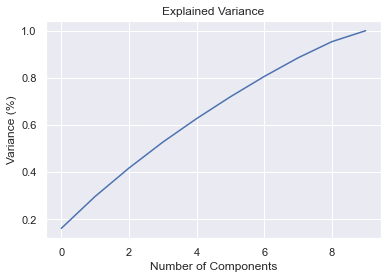

In [20]:
##########################################################################################################################

# Following code is for plotting PCA figure to check if we can reduce the no of features and achieve better accuracy

##########################################################################################################################

from sklearn.decomposition import PCA
print(features.shape)


import matplotlib.pyplot as plt
import numpy as np
pca = PCA()
principalComponents = pca.fit_transform(features)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [21]:
##################################################################################
# out of 10, 9 gives maximum variance so we go with 9 and test
##################################################################################

pca = PCA(n_components=9)
features = pca.fit_transform(features)

principal_x = pd.DataFrame(features,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9'])
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9
0,0.321202,-0.030446,0.405500,-0.049841,0.013528,1.103211,-1.665505,1.008002,1.081968
1,0.333242,0.179056,0.208272,0.089921,-0.008345,0.956321,-1.684997,0.859884,0.900341
2,-0.513620,-0.289723,0.392032,-0.195900,0.004062,0.794702,-1.716990,0.959908,1.107019
3,-1.045338,-0.430322,0.411219,-0.256953,0.003008,0.726102,-1.697314,1.018797,1.251350
4,-0.893894,-0.371035,0.427481,-0.214430,0.000090,0.845791,-1.661781,1.072309,1.311029
...,...,...,...,...,...,...,...,...,...
265185,0.525452,-0.493250,1.807968,0.924833,-0.034735,0.223055,0.207973,-0.201915,-1.430646
265186,-0.160885,-0.365200,1.776913,1.007862,-0.025104,0.146182,0.363726,-0.076219,-0.990483
265187,-0.742096,1.338463,0.984952,2.003259,0.027675,-0.324762,0.850058,-0.253560,-0.352445
265188,-0.034240,-0.725274,2.187199,0.771001,-0.031829,0.557879,0.437928,0.273663,-0.567292


In [22]:
######################################################################################
# Performing Linear Regression after PCA
######################################################################################


x_train,x_test,y_train,y_test = train_test_split(principal_x,target,test_size = 0.15, random_state= 355)
lin_reg_1=linear_model.LinearRegression()

lin_reg_1.fit(x_train,y_train)
y_pred=lin_reg_1.predict(x_test)

from sklearn.metrics import accuracy_score,mean_squared_error,r2_score

print('mean_squared_error::::::::::::::::::', mean_squared_error(y_test, y_pred))

#lin_reg_model_before_RSCV=lin_reg_1

print('R2 score:::::::::::',r2_score(y_test, y_pred))


mean_squared_error:::::::::::::::::: 9314078114.686611
R2 score::::::::::: -0.07324557805382059


In [23]:
######################################################################################
# Performing Random Forest after PCA
######################################################################################

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)
print(y_pred)
from sklearn.metrics import r2_score
print('r2 score::::::::::::::',r2_score(y_test , y_pred))
print('mean_squared_error::::::::::::::',mean_squared_error(y_test , y_pred))
print('Regression score::::::::::',regressor.score(x_test, y_test))


[ 760.8403657  1805.4        1226.94545455 ... 1412.5        1715.
 1389.5       ]
r2 score:::::::::::::: 0.40395131715798205
mean_squared_error:::::::::::::: 5172762045.9557295
Regression score:::::::::: 0.40395131715798205
